<a href="https://colab.research.google.com/github/NayanaPradeep/Bike_Sharing_Demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **SOLUTION**

## **Importing the libraries**

In [ ]:
# Importing the libraries for EDA and regression analysis
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt                          
import matplotlib.image as mpimg                             
%matplotlib inline                                            
import seaborn as sns  

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

 

## **Reading the Dataset**

In [ ]:
#Mount the drive to load the dataset 
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the file to bikedata_df dataset 
file_path = '/content/drive/MyDrive/Colab Notebooks/Bike Sharing Demand Prediction - Nayana Pradeep/SeoulBikeData.csv'
bikedata_df=pd.read_csv(file_path,sep=',',encoding='latin')

## **Exploratory Data Analysis And Visualization**

In [ ]:
#Contents of the dataset
bikedata_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Top 5 records in the dataset
bikedata_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Last 5 records in the dataset
bikedata_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


Dataset contains the record from 01/12/2017 to 30/11/2018 which means it contains the data of one full year.

In [ ]:
#Check the number of rows and columns in the dataset
bikedata_df.shape

(8760, 14)

In [ ]:
#Find the total number of elements in the dataset
bikedata_df.size

122640

In [ ]:
#Find the columns and datatypes in the dataset
bikedata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Find the type of seasons available
bikedata_df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
#Understand the hour details of the dataset
bikedata_df.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
#Understanding how the hours are distrinuted and checking if it is a categorical value
bikedata_df["Hour"].value_counts().sort_index()

0     365
1     365
2     365
3     365
4     365
5     365
6     365
7     365
8     365
9     365
10    365
11    365
12    365
13    365
14    365
15    365
16    365
17    365
18    365
19    365
20    365
21    365
22    365
23    365
Name: Hour, dtype: int64

In [ ]:
#Descriptive Statistic Summary
bikedata_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#Checking the count for each of the dates provided
bikedata_df["Date"].value_counts()

27/01/2018    24
15/05/2018    24
11/01/2018    24
07/11/2018    24
26/01/2018    24
              ..
06/01/2018    24
24/08/2018    24
04/05/2018    24
25/04/2018    24
17/05/2018    24
Name: Date, Length: 365, dtype: int64

In [ ]:
#Checking for null values
bikedata_df.isna().sum().sum()

0

In [ ]:
#Checking for duplicate values
len(bikedata_df[bikedata_df.duplicated()])

0

In [ ]:
#Finding the number of records for each of the seasons
bikedata_df["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#Finding the number of days in a year for each of the seasons
bikedata_df["Seasons"].value_counts()/24

Spring    92.0
Summer    92.0
Autumn    91.0
Winter    90.0
Name: Seasons, dtype: float64

In [ ]:
ByDate_df = bikedata_df.groupby('Date')
ByDate_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,30/11/2018,474,0,1.8,62,1.6,1411,-4.7,0.0,0.0,0.0,Autumn,No Holiday,Yes
8737,30/11/2018,456,1,1.3,63,2.0,1379,-4.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8738,30/11/2018,300,2,0.6,66,0.5,1368,-5.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8739,30/11/2018,213,3,-0.1,69,0.9,1338,-5.1,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Total number of bikes rent per season
bikedata_df.groupby('Seasons').sum()['Rented Bike Count']

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

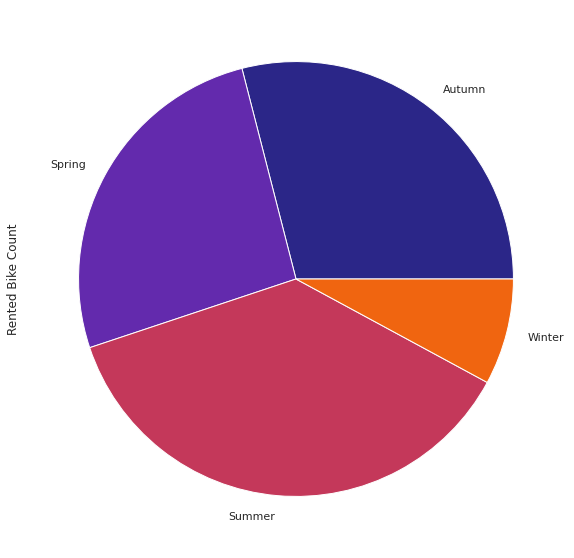

In [ ]:
#Total number of bikes rent per season ----pie chart
bikedata_df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

In [ ]:
bikedata_df.groupby('Functioning Day').sum()['Rented Bike Count']

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

In [ ]:
bikedata_df.groupby('Holiday').sum()['Rented Bike Count']

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

In [ ]:
bikedata_df.groupby('Date',sort='True').sum()['Rented Bike Count'].nsmallest(20)

Date
02/10/2018       0
03/11/2018       0
04/10/2018       0
06/11/2018       0
09/10/2018       0
09/11/2018       0
10/05/2018       0
11/04/2018       0
18/09/2018       0
19/09/2018       0
28/09/2018       0
30/09/2018       0
23/04/2018     977
08/11/2018    1721
24/12/2017    2014
04/02/2018    2487
16/02/2018    2593
05/04/2018    2596
18/12/2017    2620
27/01/2018    2693
Name: Rented Bike Count, dtype: int64

In [ ]:
bikedata_df.groupby('Date',sort='True').sum()['Rented Bike Count'].nlargest(20)

Date
13/06/2018    36149
19/06/2018    35349
08/06/2018    35103
20/06/2018    34639
21/06/2018    34621
12/06/2018    34544
16/06/2018    34360
22/06/2018    34079
06/07/2018    33676
15/06/2018    33492
05/06/2018    33424
04/06/2018    33257
25/06/2018    32702
17/06/2018    32487
07/06/2018    32002
23/06/2018    31949
01/06/2018    31928
12/09/2018    31809
04/07/2018    31781
11/09/2018    31694
Name: Rented Bike Count, dtype: int64

We can conclude the below details about the data from the primary checks performed above
 

*   Dataset contains the details of each hour from 01/12/2017 to 30/11/2018 .This means that the 8760 records are the 24 records for each day in the one year duration (24 * 365 = 8760 )
*   There are **no null values** in the dataset
*   Date, Hour , Seasons, Functioning Day and Holiday are the categorical features
*   There are **no duplicates** in the dataset
*   Maximum number of bikes rented in an hour is 3556. The average count is 704.602055

*   Maximum number of bikes rented in a day is 36149 on 13th June 2018 (13/06/2018)    
*   There were 12 days in the year where there were no bikes rented in a day. These 12 days are considered as non functioning day as per the data set.


*   People rent the **most number of bikes during the summer season and least during the winter season**


*   Bike rental demand is less on holidays. This indicates that people prefer to use these bikes as mode of transportation to work.




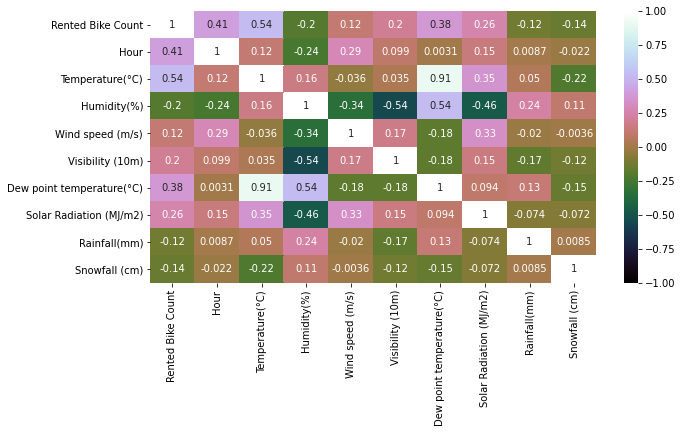

In [ ]:
#Correlation map for the dataset
plt.figure(figsize=(10,5))
sns.heatmap(bikedata_df.corr(), vmin=-1, cmap='cubehelix', annot=True)



1.   Temperature and Dew point temperature  are strongly correlated

2.   Humidity and Dew point temperature are strongly correlated

3.   Visibility and Humidity are strongly correlated

4.   Visibility is negatively correlated to dew point temperature, rainfall and snowfall.



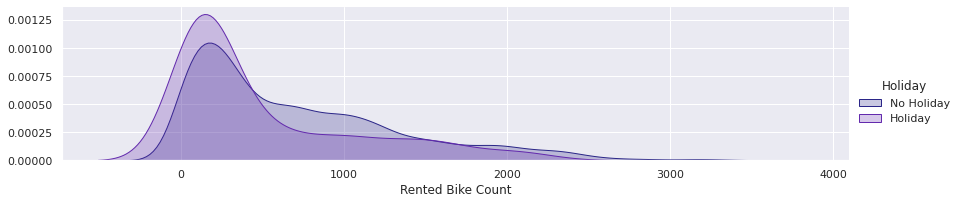

In [ ]:
#Plot to find the rented bike count for each season
sns.set_palette("CMRmap")
fig = sns.FacetGrid(bikedata_df, hue='Holiday', aspect=4)
fig.map(sns.kdeplot, 'Rented Bike Count', shade=True)
fig.add_legend()

Above plot is a visualization for the demand difference when it is a holiday and when it is not.

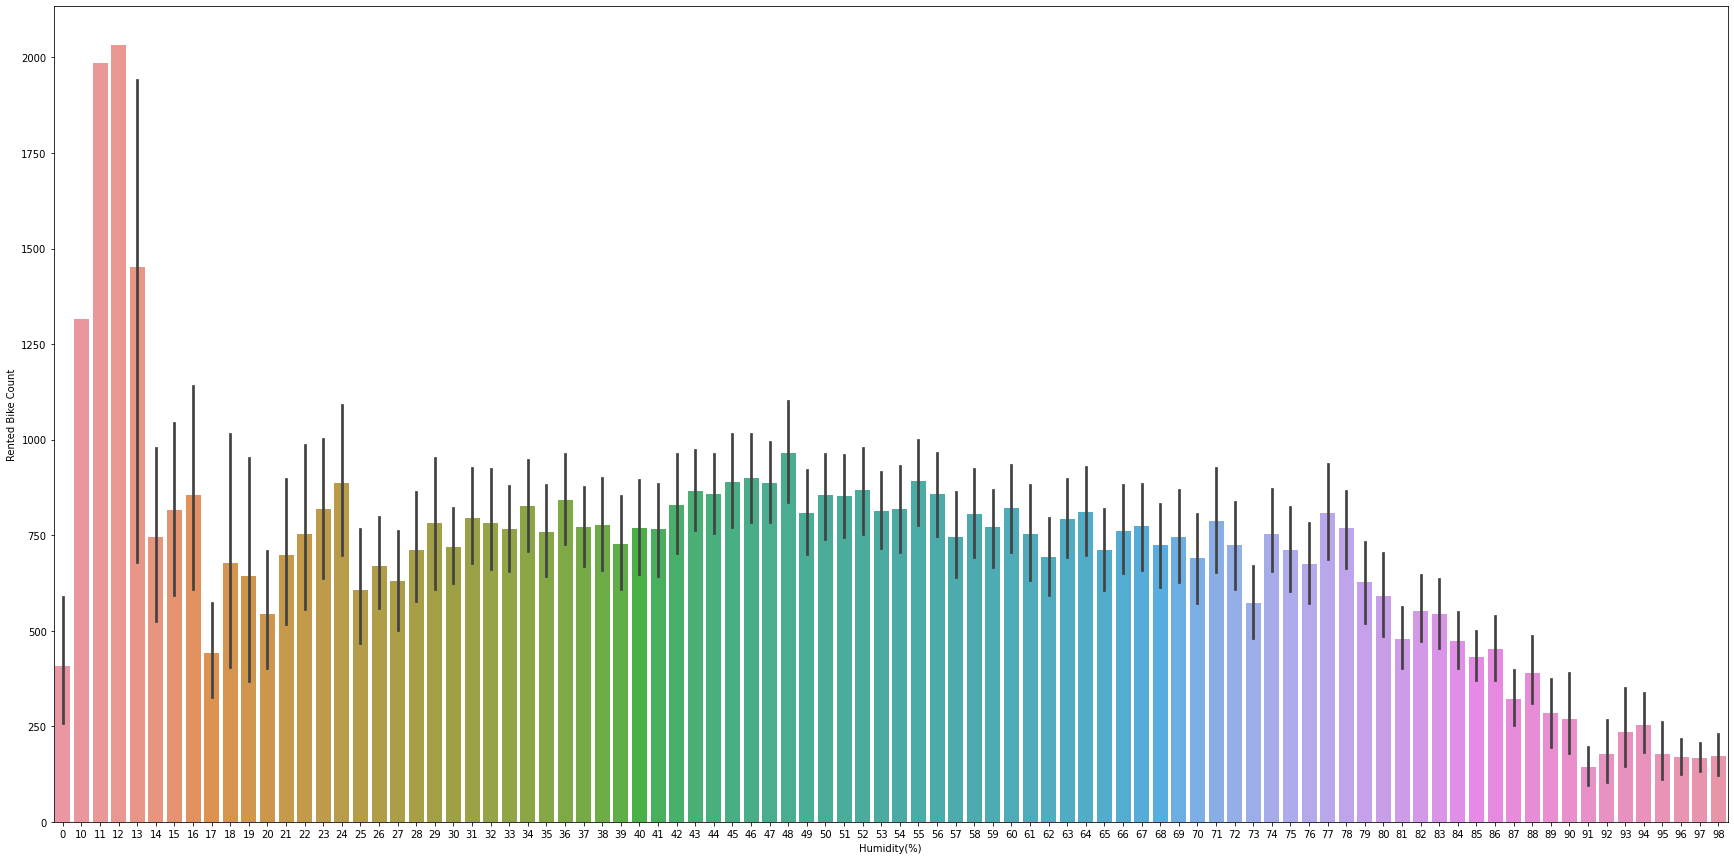

In [ ]:
#Using the barplot to understand how the humidity is impacting the count of rented bikes
plt.figure(figsize=(30,15))
sns.barplot(data=bikedata_df, x="Humidity(%)",y="Rented Bike Count")

Rented Bike count is less when the humidity is high

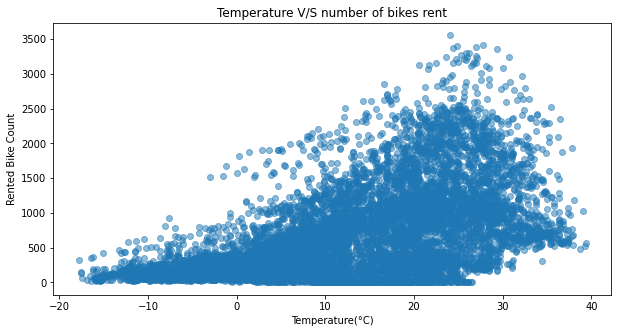

In [ ]:
#Using the scatterplot to understand the temperature impact on rented bike count
plt.figure(figsize=(10,5))
plt.scatter(bikedata_df['Temperature(°C)'], bikedata_df['Rented Bike Count'], alpha=0.5)
plt.title('Temperature V/S number of bikes rent')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

As the temperature increases, there is a rise in number of bikes rent. This explains the maximum demand during the summer season

Text(0.5, 1.0, 'Distribution of rented bike count over the hours with respect to the 4 seasons')

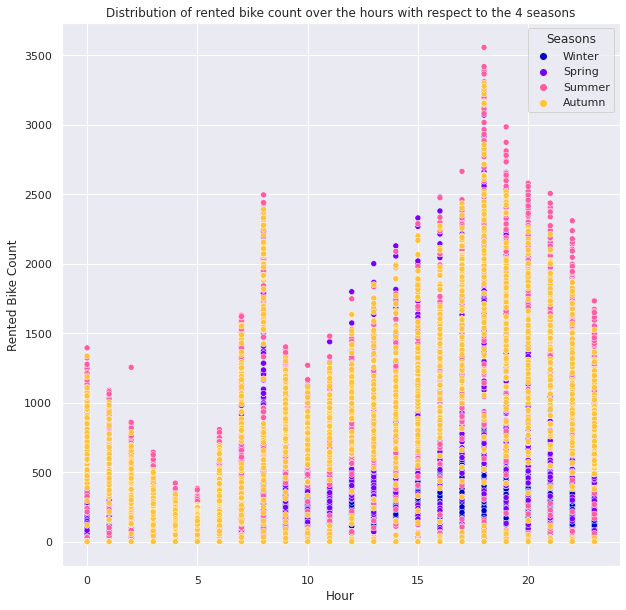

In [ ]:
#Distribution of the rent bike count over the hours of data along with the seasons
sns.set(rc={"figure.figsize": (10, 10)})
ax= sns.scatterplot(data=bikedata_df, x="Hour", y="Rented Bike Count",hue='Seasons',palette='gnuplot2')
ax.set_title('Distribution of rented bike count over the hours with respect to the 4 seasons')

 
*   Bike rental demand is at its peak between 15th hour to 20 th hour ie 3 pm to 8pm. 
*   The demand for the bike rental service is the most at 6pm to 7 pm.
*   People avail this service least during 4 am to 6 am


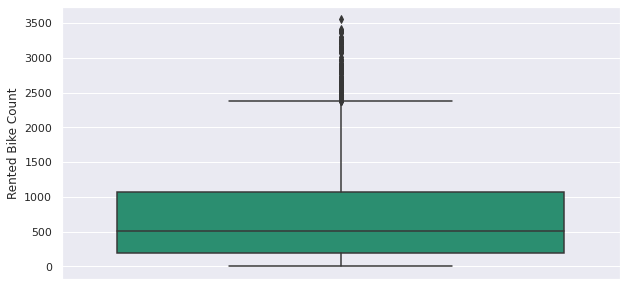

In [ ]:
#Finding outliers in the dependent variable
sns.boxplot(data=bikedata_df,  y='Rented Bike Count')

We can infer the existence of the outliers and  that the median of the 'Rent Bike Count' is 500. Since the outlier data is minimal, it is not necessary to remove them.

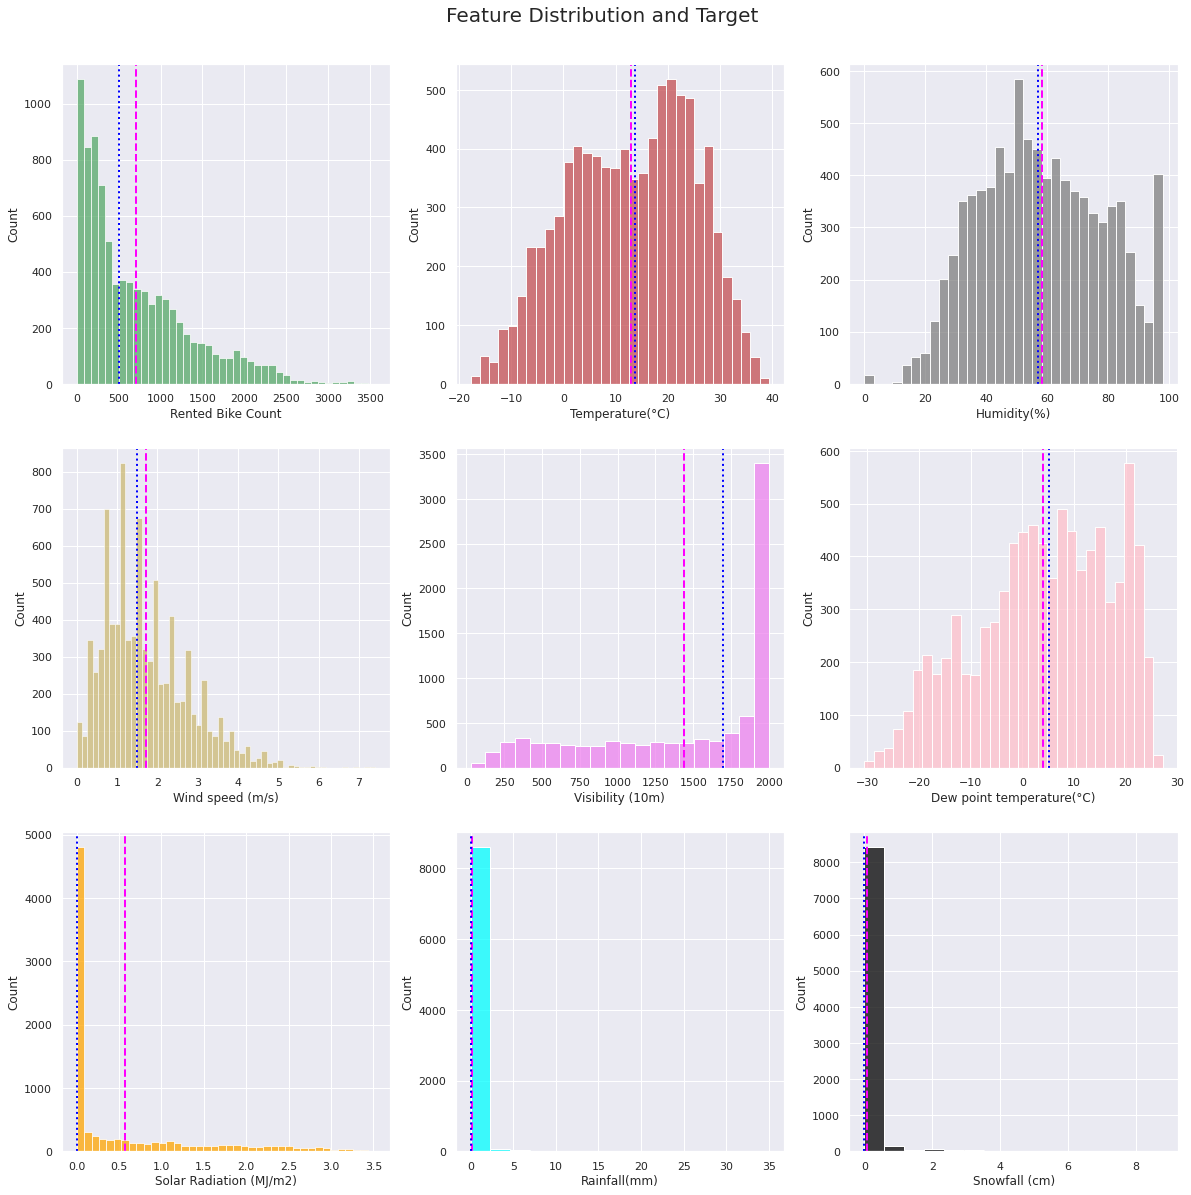

In [ ]:
#Plotting the numerical features to understand their distribution with respect to the mean and median

categorical_features = ['Date', 'Hour', 'Seasons','Holiday','Functioning Day']                                      #Categorical Features   
numeric_features_and_depend_var = [i for i in bikedata_df.describe().columns if i not in categorical_features]      #Numerical Features with dependent variable
                                                                                   
plot_colours=['g','r','grey','y','violet','pink','orange','cyan','black']                                           #Different Colour for each plot

numeric_features_and_depend_var = np. reshape(numeric_features_and_depend_var, (3, 3))                              #Transforming to 2-D array for ease of display and loop  
plot_colours = np. reshape(plot_colours, (3, 3))                                                                    #Transforming to 2-D array for ease of display and loop

fig, ax = plt.subplots(3,3, figsize=(20,20))

for i in range(0,3):
  for j in range(0,3):
    feature = numeric_features_and_depend_var[i][j]
    plt_colour=plot_colours[i][j]
    sns.histplot(bikedata_df[feature], ax=ax[i][j],color=plt_colour)
    ax[i][j].axvline(bikedata_df[feature].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[i][j].axvline(bikedata_df[feature].median(), color='blue', linestyle='dotted', linewidth=2)

fig.suptitle('Feature Distribution and Target', fontsize=20, y=0.92)    
plt.show()
    

From the above distribution plot, we can see the following


*   Rented_Bike_Count, windspeed, solar radiation, rainfall and snowfall are  positively skewed
*   Temperature and humidity is uniformly distributed
*   Visibility and dewpoint temperature is negatively skewed






In [ ]:
#Identifying the numeric features
depend_var = 'Rented Bike Count' #Dependent Variable --- Rented Bike Count
numeric_features = [i for i in bikedata_df.describe().columns if i not in depend_var and i not in categorical_features ]
numeric_features


['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

## **Dependent Variable and its Relation with the Numeric Features**

In [ ]:
depend_var = 'Rented Bike Count' #Dependent Variable --- Rented Bike Count

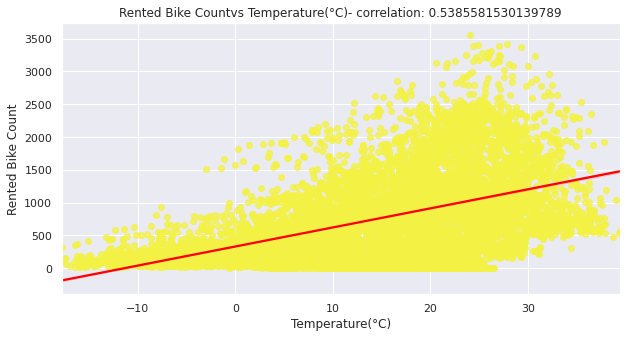

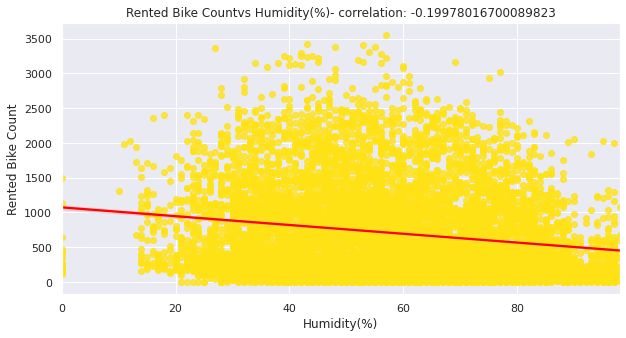

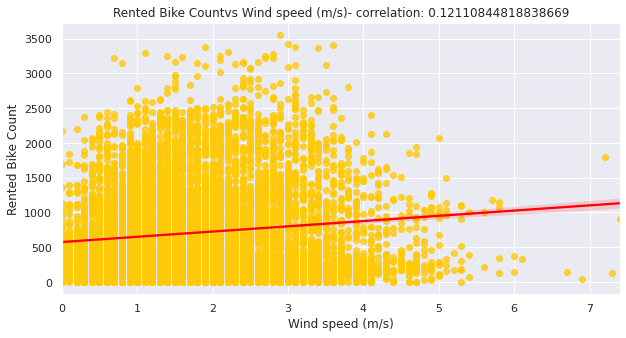

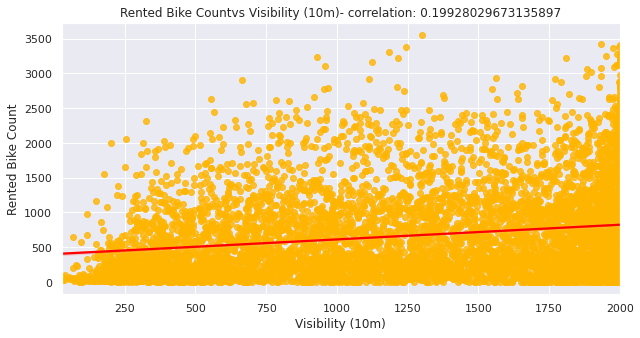

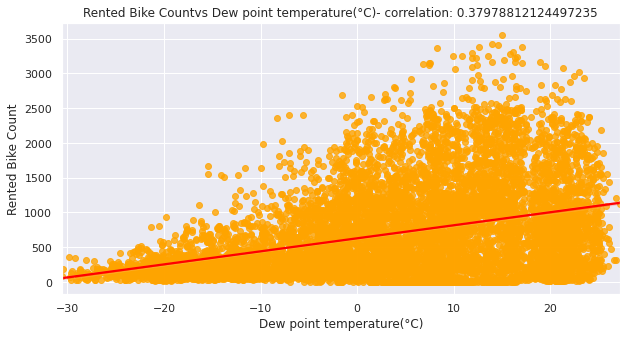

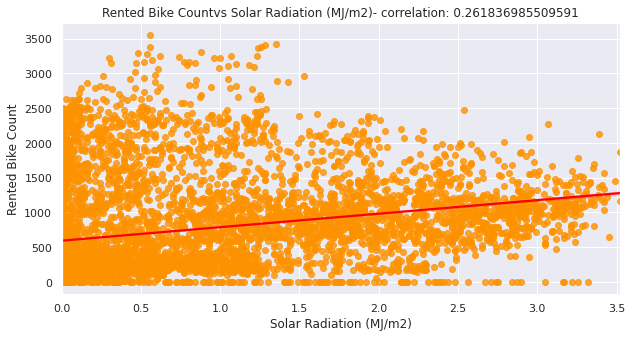

In [99]:
#Plotting the numeric values distribution with respect to the dependent variable Rented Bike Count
rgb_values = sns.color_palette("Wikkkstia")
color_map = dict(zip(numeric_features, rgb_values))
plt.rcParams['figure.figsize'] = (10, 5)
for col, key in zip(numeric_features, color_map):
  plt.figure()
  feature = bikedata_df[col]
  label = bikedata_df['Rented Bike Count']
  correlation = feature.corr(label)
  sns.regplot(x=bikedata_df[col], y = bikedata_df['Rented Bike Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "red"}).set(title='Rented Bike Countvs ' + col + '- correlation: ' + str(correlation))

In [109]:
#Correlation table of numeric features with Rented Bike Count in descending order
corr=pd.DataFrame(bikedata_df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation with Rented Bike Count'])
corr.style.background_gradient(cmap=sns.light_palette("Green", as_cmap=True))

,Correlation with Rented Bike Count
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Dew point temperature(°C),0.379788
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


Key takeaways from the analysis so far


*   The dependent variable 'Rented Bike Count' has a negative correlation with the temperature 

*   Numeric features 'Dew point temperature(°C)' and 'Temperature(°C)'  have a very strong correlation. It is safer to drop the column 'Dew point temperature(°C)' to avoid multicollinearity.


*  The bike rental demands decreases when the humidity increases.

*  Less visibility, more rainfall or snowfall is also contributing to less number of bike rental services.



